In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dataset

In [3]:
!kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:07<00:00, 70.4MB/s]
100% 812M/812M [00:07<00:00, 107MB/s] 


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()

In [6]:
dataset = "/content/train.zip"
with ZipFile(dataset,"r") as zip_train:
  zip_train.extractall()

In [7]:
import os
path,dirs,files = next(os.walk("/content/train"))
length = len(files)
print("Number of images :",length)
for filenames in files:
  print(filenames)

Streaming output truncated to the last 5000 lines.
cat.4566.jpg
dog.8571.jpg
cat.697.jpg
dog.879.jpg
cat.10231.jpg
dog.11210.jpg
cat.2375.jpg
dog.11310.jpg
cat.3093.jpg
cat.9428.jpg
cat.11446.jpg
cat.270.jpg
cat.845.jpg
dog.7819.jpg
cat.8036.jpg
cat.5905.jpg
dog.10881.jpg
dog.1623.jpg
cat.6325.jpg
cat.4512.jpg
dog.12012.jpg
cat.6977.jpg
cat.8721.jpg
cat.11718.jpg
cat.8836.jpg
dog.7036.jpg
dog.11427.jpg
dog.8403.jpg
dog.10345.jpg
cat.2472.jpg
cat.11849.jpg
dog.5671.jpg
dog.1931.jpg
cat.1652.jpg
cat.8088.jpg
cat.2532.jpg
cat.10991.jpg
dog.2250.jpg
cat.488.jpg
cat.9681.jpg
cat.5512.jpg
cat.4209.jpg
dog.5454.jpg
cat.2232.jpg
dog.11058.jpg
cat.4339.jpg
dog.3075.jpg
cat.2570.jpg
cat.4993.jpg
cat.6009.jpg
cat.970.jpg
dog.2113.jpg
cat.1230.jpg
dog.7096.jpg
cat.3024.jpg
cat.728.jpg
dog.2705.jpg
dog.12218.jpg
dog.3162.jpg
dog.7475.jpg
cat.6883.jpg
cat.2515.jpg
cat.7325.jpg
dog.10042.jpg
dog.12205.jpg
dog.10178.jpg
dog.11181.jpg
cat.944.jpg
cat.1791.jpg
cat.11205.jpg
cat.12355.jpg
dog.438.jpg
dog

In [52]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


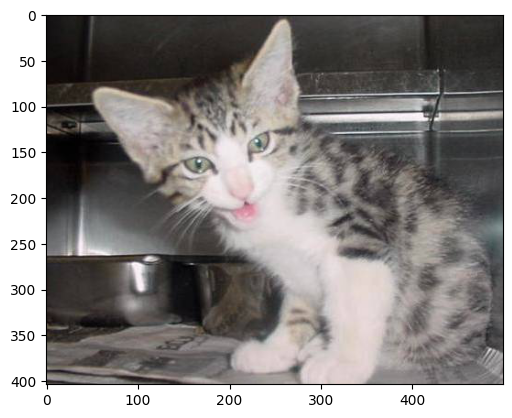

filesize : 24625 bytes
Image size : 499 x 404


In [9]:
img_path = "/content/train/cat.1971.jpg"
img = pltimg.imread(img_path)
temp = plt.imshow(img)
plt.show(temp)

file_size = os.path.getsize(img_path)
print(f"filesize : {file_size} bytes")

img_pixel = Image.open(img_path)
width,height = img_pixel.size
print(f"Image size : {width} x {height}")

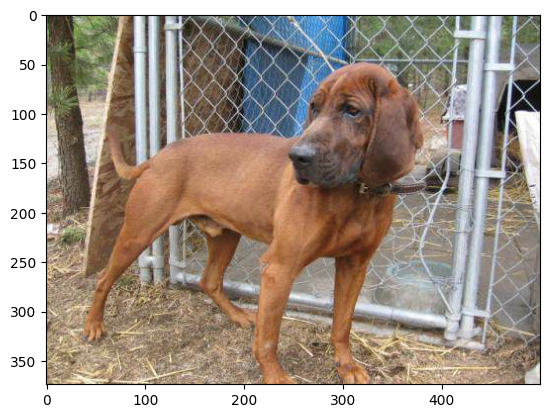

filesize : 44298 bytes
Image size : 500 x 374


In [10]:
img_path = "/content/train/dog.4371.jpg"
img = pltimg.imread(img_path)
temp = plt.imshow(img)
plt.show(temp)

file_size = os.path.getsize(img_path)
print(f"filesize : {file_size} bytes")

img_pixel = Image.open(img_path)
width,height = img_pixel.size
print(f"Image size : {width} x {height}")

Dog and Cat count:

In [11]:
file_names = os.listdir("/content/train")
for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
dog
dog
cat


In [12]:
dog_count = 0
cat_count = 0
for name in file_names:
  if name[0:3] == "dog":
    dog_count+=1
  elif name[0:3] == "cat":
    cat_count+=1

print(f"Total dog images : {dog_count}")
print(f"Total cat images : {cat_count}")

Total dog images : 12500
Total cat images : 12500


In [13]:
os.mkdir("/content/img_resized")


original_folder = "/content/train/"
resized_folder = "/content/img_resized/"

dog_count = 0
cat_count = 0

for i in range(1500):
  file_name = os.listdir(original_folder)[i]
  img_path = original_folder + file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_path = resized_folder + file_name
  img.save(new_path)

  # distribution of cats and dogs
  if file_name[0:3] == "dog":
    dog_count+=1
  elif file_name[0:3] == "cat":
    cat_count+=1

print(f"Total dog images from new dataset : {dog_count}")
print(f"Total cat images from new dataset : {cat_count}")


Total dog images from new dataset : 730
Total cat images from new dataset : 770


In [14]:
path = "/content/img_resized"
files = os.listdir(path)
for i in range(3):
  print(files[i])

dog.1924.jpg
cat.9239.jpg
dog.3359.jpg


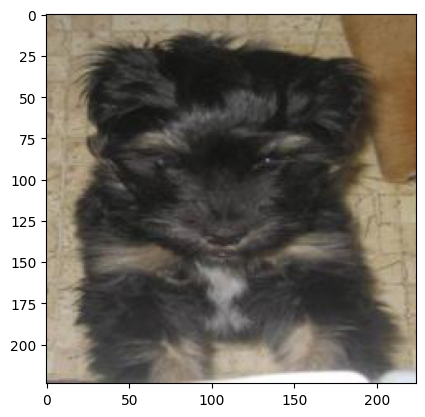

filesize : 8087 bytes
Image size : 224 x 224


In [15]:
img_path = "/content/img_resized/dog.1924.jpg"
img = pltimg.imread(img_path)
temp = plt.imshow(img)
plt.show(temp)

file_size = os.path.getsize(img_path)
print(f"filesize : {file_size} bytes")

img_pixel = Image.open(img_path)
width,height = img_pixel.size
print(f"Image size : {width} x {height}")

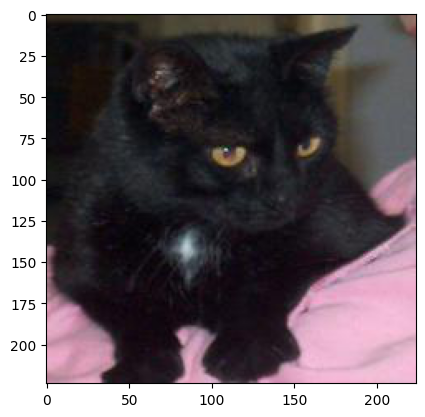

filesize : 6500 bytes
Image size : 224 x 224


In [16]:
img_path = "/content/img_resized/cat.9239.jpg"
img = pltimg.imread(img_path)
temp = plt.imshow(img)
plt.show(temp)

file_size = os.path.getsize(img_path)
print(f"filesize : {file_size} bytes")

img_pixel = Image.open(img_path)
width,height = img_pixel.size
print(f"Image size : {width} x {height}")

Lables encoding for cats and dogs

Dog --> 0

Cat --> 1

In [17]:
file_names = os.listdir("/content/img_resized/")

labels = []

for temp in file_names:
  name = temp[0:3]

  if name == "dog":
    labels.append(0)
  elif name == "cat":
    labels.append(1)


In [18]:
print(file_names[0:5])
print(labels[0:5])

['dog.1924.jpg', 'cat.9239.jpg', 'dog.3359.jpg', 'dog.7855.jpg', 'cat.4458.jpg']
[0, 1, 0, 0, 1]


In [19]:
values , counts = np.unique(labels,return_counts = True)
print(values)
print(counts)

[0 1]
[730 770]


Converting images to numoy arrays : 

In [20]:
import cv2
import glob

In [21]:
img_directory = "/content/img_resized/"
img_extension = ['png','jpg']

files = []
[files.extend(glob.glob(img_directory + "*." + i)) for i in img_extension]

dog_cat_imgs = np.asarray([cv2.imread(file) for file in files])

In [22]:
print(dog_cat_imgs)
type(dog_cat_imgs)

[[[[126 148 160]
   [126 148 160]
   [124 146 158]
   ...
   [ 67 105 135]
   [ 67 105 135]
   [ 69 107 137]]

  [[125 147 159]
   [121 143 155]
   [117 139 151]
   ...
   [ 71 109 139]
   [ 70 108 138]
   [ 70 108 138]]

  [[122 146 158]
   [115 139 151]
   [109 133 145]
   ...
   [ 75 113 143]
   [ 73 111 141]
   [ 71 109 139]]

  ...

  [[164 174 181]
   [162 172 179]
   [160 169 179]
   ...
   [238 229 225]
   [236 230 225]
   [236 230 225]]

  [[130 133 141]
   [130 133 141]
   [130 132 143]
   ...
   [237 229 222]
   [235 229 222]
   [235 229 222]]

  [[107 109 117]
   [108 110 118]
   [108 108 120]
   ...
   [240 232 225]
   [238 232 225]
   [238 232 225]]]


 [[[ 26  42  49]
   [ 27  43  50]
   [ 27  43  50]
   ...
   [103 109 146]
   [103 110 149]
   [109 116 155]]

  [[ 29  42  50]
   [ 28  44  51]
   [ 30  43  51]
   ...
   [100 108 145]
   [102 110 147]
   [108 116 153]]

  [[ 31  42  50]
   [ 30  43  51]
   [ 32  43  51]
   ...
   [ 99 108 142]
   [102 111 145]
   [106 116

numpy.ndarray

In [23]:
print(dog_cat_imgs.shape)

(1500, 224, 224, 3)


In [24]:
X = dog_cat_imgs
Y = np.asarray(labels)

Train test split :

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y ,test_size=0.2 ,random_state = 2)

In [26]:
print(X.shape ,X_train.shape ,X_test.shape)

(1500, 224, 224, 3) (1200, 224, 224, 3) (300, 224, 224, 3)


In [27]:
# scaling the dataset 
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
print(X_train_scaled)

[[[[0.99607843 1.         0.99215686]
   [1.         1.         0.99607843]
   [1.         1.         1.        ]
   ...
   [1.         0.99607843 1.        ]
   [1.         0.99215686 1.        ]
   [1.         0.99215686 1.        ]]

  [[0.99607843 1.         0.99215686]
   [1.         1.         0.99607843]
   [1.         1.         1.        ]
   ...
   [1.         0.99607843 1.        ]
   [1.         0.99215686 1.        ]
   [1.         0.99215686 1.        ]]

  [[0.99607843 1.         0.99215686]
   [1.         1.         0.99607843]
   [1.         1.         1.        ]
   ...
   [1.         0.99607843 1.        ]
   [1.         0.99607843 1.        ]
   [1.         0.99607843 1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         0.99607843]
   [1.         1.         0.98823529]
   [1.         1.         0.98823529]]

  [[1.         1.         1.        ]
   [1. 

In [29]:
print(X_test_scaled)

[[[[0.21960784 0.4745098  0.32156863]
   [0.30588235 0.54901961 0.40784314]
   [0.58039216 0.78823529 0.65882353]
   ...
   [0.94901961 0.96862745 0.96078431]
   [0.94509804 0.96862745 0.94901961]
   [0.94509804 0.96862745 0.94901961]]

  [[0.22352941 0.47058824 0.31764706]
   [0.43529412 0.6745098  0.53333333]
   [0.58431373 0.78823529 0.67058824]
   ...
   [0.94901961 0.96862745 0.96078431]
   [0.94509804 0.96862745 0.94901961]
   [0.94509804 0.96862745 0.94901961]]

  [[0.25098039 0.49019608 0.34901961]
   [0.51372549 0.74117647 0.60392157]
   [0.51372549 0.71764706 0.6       ]
   ...
   [0.94901961 0.96862745 0.96078431]
   [0.94901961 0.96862745 0.96078431]
   [0.94509804 0.96470588 0.95686275]]

  ...

  [[0.81568627 0.83137255 0.83529412]
   [0.81568627 0.83137255 0.83529412]
   [0.81568627 0.83137255 0.83529412]
   ...
   [0.89019608 0.90588235 0.90980392]
   [0.89019608 0.90588235 0.90980392]
   [0.89019608 0.90588235 0.90980392]]

  [[0.81568627 0.83137255 0.83529412]
   [0.8

Pretrained Neural Network :

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet, input_shape = (224,224,3), trainable=False)

In [32]:
num_of_classes = 2

model = tf.keras.Sequential([
    
  pretrained_model,
  tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model.compile(
    
  optimizer = "adam",
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics = ['accuracy']

)

In [34]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
38/38 [==============================] - 49s 1s/step - loss: 0.1684 - accuracy: 0.9383
Epoch 2/5
38/38 [==============================] - 41s 1s/step - loss: 0.0667 - accuracy: 0.9767
Epoch 3/5
38/38 [==============================] - 51s 1s/step - loss: 0.0518 - accuracy: 0.9800
Epoch 4/5
38/38 [==============================] - 53s 1s/step - loss: 0.0387 - accuracy: 0.9892
Epoch 5/5
38/38 [==============================] - 50s 1s/step - loss: 0.0339 - accuracy: 0.9900


In [55]:
score, accuracy = model.evaluate(X_test_scaled,Y_test)
print(f"Loss : {score}")
print(f"Accuracy : {accuracy}")

10/10 [==============================] - 11s 1s/step - loss: 0.0404 - accuracy: 0.9767
Loss : 0.040408045053482056
Accuracy : 0.9766666889190674


Building the Neural Network :

In [39]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [41]:
model1 = tf.keras.Sequential([
    Conv2D(64,(3,3), activation = "relu"),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3), activation = "relu"),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, input_shape = [224,224,3],activation = "relu"),
    Dense(2, activation = "softmax")
])

In [48]:
model1.compile(
    
  optimizer = "adam",
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']

)

In [49]:
model1.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
38/38 [==============================] - 179s 5s/step - loss: 0.6865 - accuracy: 0.5742
Epoch 2/5
38/38 [==============================] - 175s 5s/step - loss: 0.6562 - accuracy: 0.6525
Epoch 3/5
38/38 [==============================] - 175s 5s/step - loss: 0.5350 - accuracy: 0.7375
Epoch 4/5
38/38 [==============================] - 177s 5s/step - loss: 0.3331 - accuracy: 0.8633
Epoch 5/5
38/38 [==============================] - 175s 5s/step - loss: 0.1869 - accuracy: 0.9358


In [58]:
score1, accuracy1 = model1.evaluate(X_test_scaled,Y_test)
print(f"Loss : {score1}")
print(f"Accuracy : {accuracy1}")

10/10 [==============================] - 11s 1s/step - loss: 0.8519 - accuracy: 0.6167
Loss : 0.8519384264945984
Accuracy : 0.6166666746139526


In [57]:
data = {"Loss" : [score, score1] ,
        "Accuracy" : [accuracy , accuracy1]}
df = pd.DataFrame(data, index = ["Pretrained Mobile Net V2", "New Neural Network"])

print(df)

                              Loss  Accuracy
Pretrained Mobile Net V2  0.040408  0.976667
New Neural Network        0.851938  0.616667


Predictive System : 

In [36]:
from google.colab.patches import cv2

In [37]:
input_img_path = input("Enter the path of the file : ")
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img ,(224,224))
input_img_scaled = input_img_resize/255
image_reshape = np.reshape(input_img_scaled ,[1,224,224,3])

prediction = model.predict(image_reshape)
print(prediction)
pred_label = np.argmax(prediction)

if pred_label == 1:
  print("Its a Cat") 
else:
  print("Its a Dog")
  

KeyboardInterrupt: ignored

In [ ]:
input_img_path = input("Enter the path of the file : ")
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img ,(224,224))
input_img_scaled = input_img_resize/255
image_reshape = np.reshape(input_img_scaled ,[1,224,224,3])

prediction = model.predict(image_reshape)
print(prediction)
pred_label = np.argmax(prediction)

if pred_label == 1:
  print("Its a Cat") 
else:
  print("Its a Dog")


  
